In [1]:
import numpy as np
import pandas as pd
from math import exp, log, sqrt, pi

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Q6a

In [2]:
def log_odds_to_prob(log_odds):
    return exp(log_odds) / (1 + exp(log_odds))

print (log_odds_to_prob(-0.5))

0.37754066879814546


In [3]:
print(log_odds_to_prob(2))

0.8807970779778824


## Q6b

In [7]:
def calc_log_odds(prob):
    return log(prob / (1 - prob))

print (calc_log_odds(0.5))

0.0


In [8]:
2.5 / 0.05

50.0

## Q7

Objective: Predict whether a stock will issue a dividend <br>
X = last year's percent profit<br>
**IF issued** a divident, X_hat = 10.<br>
**IF did not issue** as divident, X_hat = 0. <br>
Variance for both classes = 36 <br>
80% of companies issued a divident<br>
X has a normal distribution<br><br>

**What is the probability that a company will issue a divided given its percentage profit was X = 4 the prior year?**

In [10]:
def lda_classifier(x, mu_k, var_k, pi_hat_k):
    return x * (mu_k / var_k) * (mu_k ** 2 / (2 * var_k)) + log(pi_hat_k)

In [17]:
log_odds_of_dividend = lda_classifier(4, 36, 10, 0.8)
probs_of_dividend = log_odds_to_prob(log_odds_of_dividend)

print("Log Odds the company distributes a divdend :{}".format(log_odds_of_dividend))
print("Probability the company distributes a divdend :{}".format(probs_of_dividend))

Log Odds the company distributes a divdend :1.3200663252290001
Probability the company distributes a divdend :0.789192741100316


In [173]:
def normal_density_fcn(mu_k, var_k, x):
    std_k = sqrt(var_k)
    exponent = (-1 / (2 * var_k)) * (x - mu_k)**2
    res = (1 / (sqrt(2 * pi) * var_k)) * exp(exponent)
    return res

In [174]:
print (normal_density_fcn(10, 36, 4))

0.006721409014420649


In [177]:
class_probs = [0.2, 0.8]
def lda2(mu_k,  var_k, x, no_div_prob, is_div_prob):
    numerator = is_div_prob * normal_density_fcn(mu_k, var_k, x)
    denominator = is_div_prob * normal_density_fcn(mu_k, var_k, x) + no_div_prob * normal_density_fcn(mu_k, var_k, x)
    
    return numerator / denominator

In [178]:
print (lda2(10, 36, 4, 0.2, 0.8))

0.8


In [179]:
class_probs = [0.2, 0.8]
def lda3(mu_yes, mu_no,var_k, x, no_div_prob, is_div_prob):
    numerator = is_div_prob * normal_density_fcn(mu_yes, var_k, x)
    denominator = is_div_prob * normal_density_fcn(mu_yes, var_k, x) + no_div_prob * normal_density_fcn(mu_no, var_k, x)
    
    return numerator / denominator

In [180]:
print (lda3(10, 0, 36, 4, 0.2, 0.8))

0.7518524532975263


## Q8

In [2]:
1.37 / 0.37

3.702702702702703

In [3]:
0.37 / 1.137

0.3254177660510114

In [4]:
def calc_odds(prob):
    return prob / (1 - prob)

In [5]:
calc_odds(0.16)

0.1904761904761905

---
# Applied Questions

In [58]:
income1 = pd.read_csv('data/Income1.csv')

## 10. Weekly Dataset

In [62]:
weekly = pd.read_csv('data/weekly.csv')
weekly['direction_dummy'] = weekly['Direction'].apply(lambda x: 1 if x=='Up' else 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,direction_dummy
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [63]:
weekly.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,direction_dummy
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1
1088,2010,1.034,0.283,1.281,2.969,-0.861,2.707105,0.069,Up,1


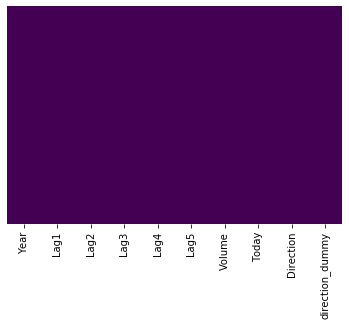

In [64]:
sns.heatmap(weekly.isnull(), cbar=False, yticklabels= False, cmap='viridis');

C:\Users\morga\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\morga\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

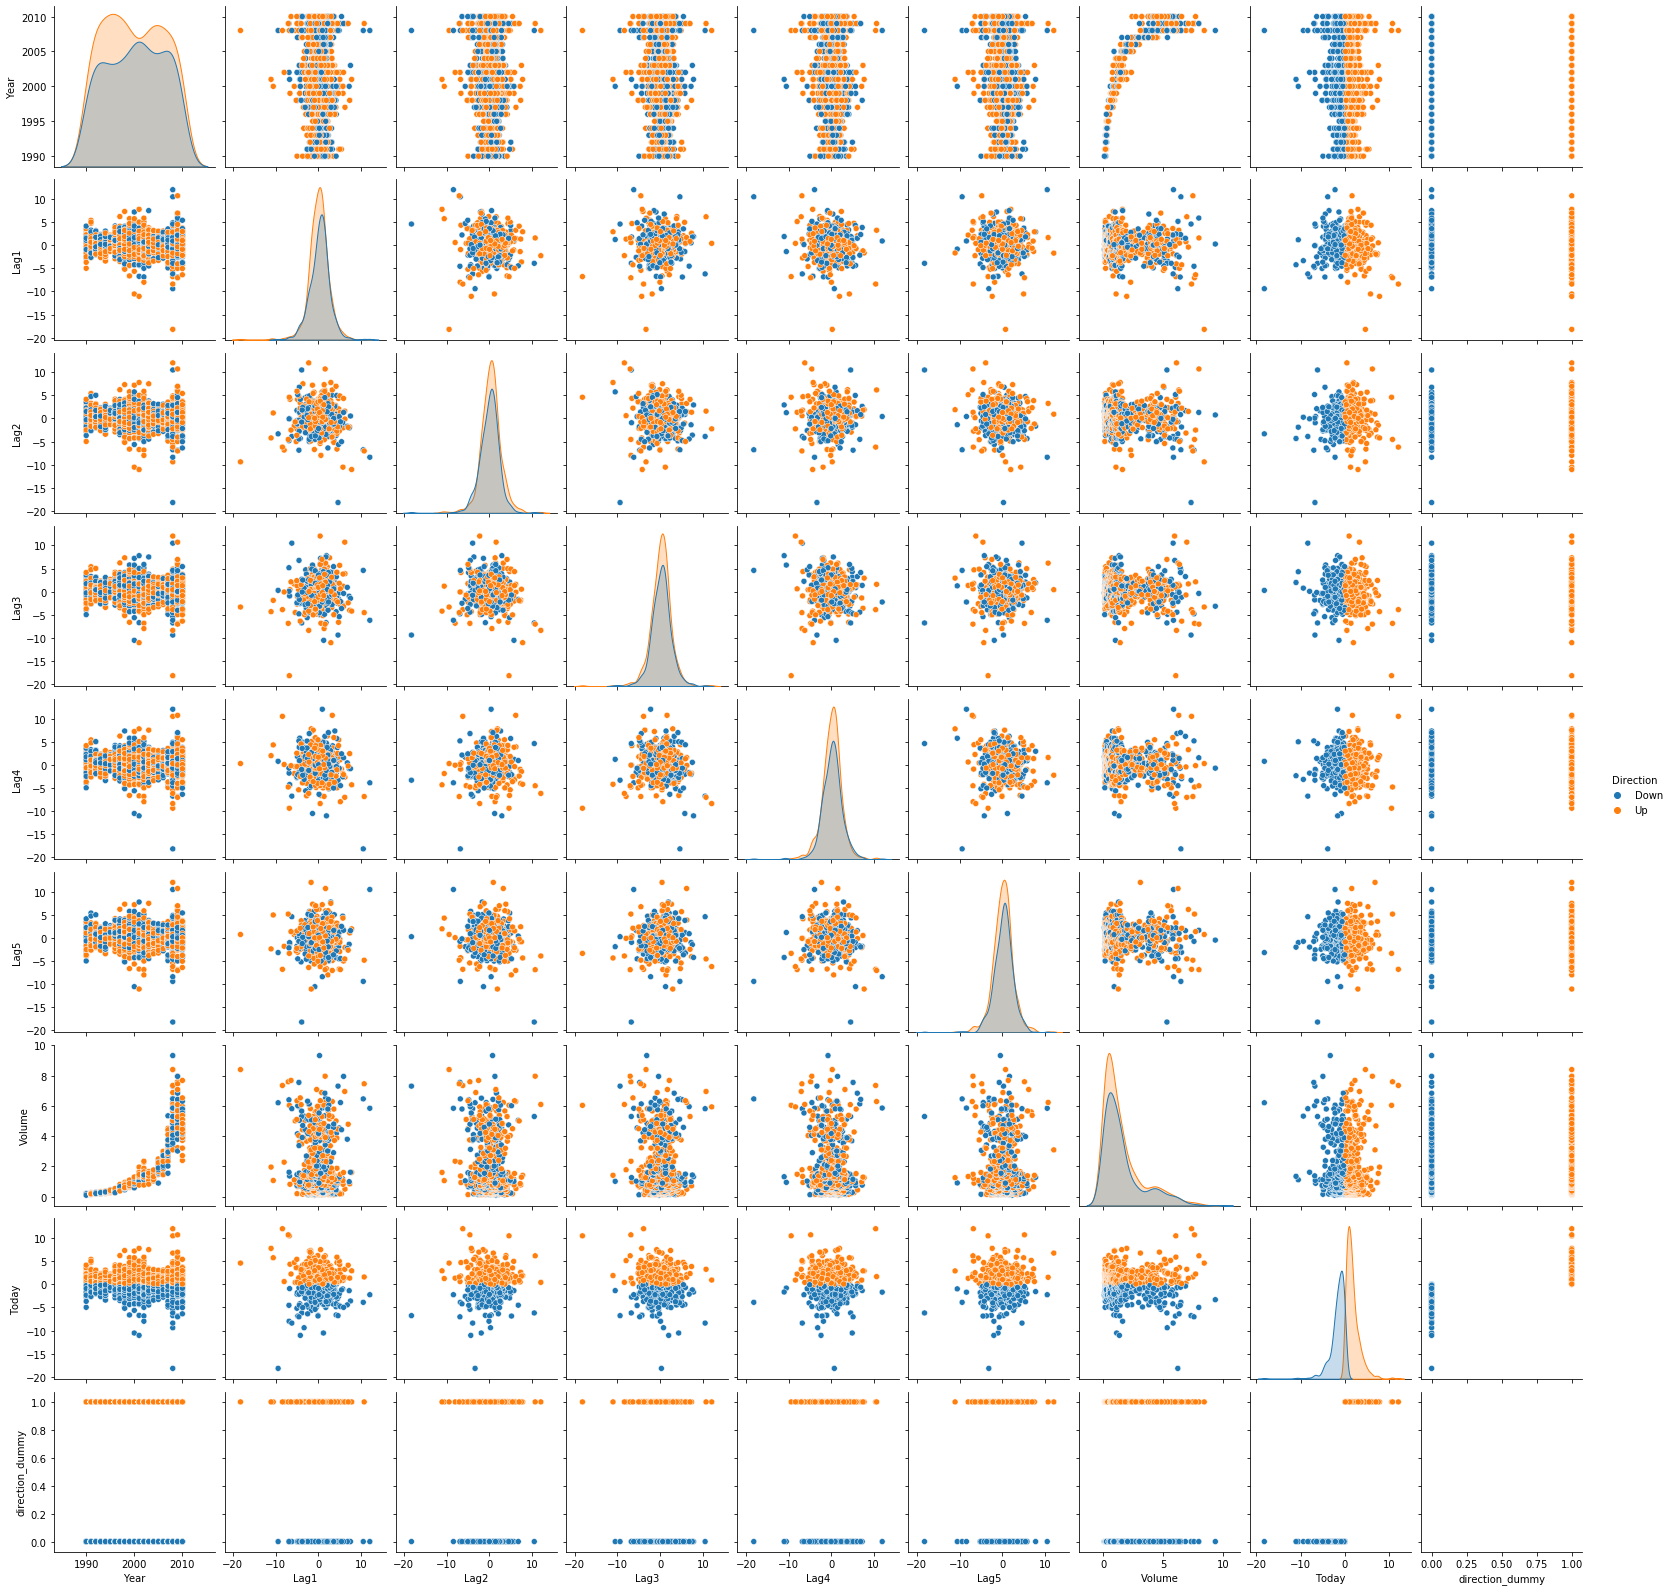

In [65]:
plt.figure(figsize=(10,10))
sns.pairplot(weekly, hue='Direction')

## Inferential Logistic Regression

In [186]:
y = weekly['direction_dummy'].values
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']].values

model = sm.Logit(y, X)

In [187]:
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4


In [188]:
results.params

array([-0.03272994,  0.06819616, -0.00809869, -0.01941955, -0.00685555,
        0.05692514])

In [189]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:               9.505e-05
Time:                        09:33:50   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0327      0.026     -1.250      0.211      -0.084       0.019
x2             0.0682      0.027      2.556      0.011       0.016       0.120
x3            -0.0081      0.026     -0.306      0.759      -0.060       0.044
x4            -0.0194      0.026     -0.740      0.459      -0.071       0.032
x5            -0.0069      0.026     -0.261      0.794      -0.058       0.045
x6             0.0569      0.027      2.125      0.034       0.004       0.109
==============================================================================
"""

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report

In [191]:
weekly_90_09 = weekly[weekly['Year'] <= 2008].copy()
print(weekly_90_09.columns)

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction', 'direction_dummy'],
      dtype='object')


In [192]:
X2 = weekly_90_09['Lag2']
y2 = weekly_90_09['direction_dummy']

In [199]:
def model_fit_test(model, X, y):
        X_reshaped = X.values.reshape(-1,1)
        fitted_model = model.fit(X_reshaped, y)
        y_pred = fitted_model.predict(X_reshaped)
        
        print("Accuracy Score: {}".format(accuracy_score(y, y_pred)))
        print("\n")
        print(confusion_matrix(y, y_pred))
        print(classification_report(y, y_pred))

In [200]:
# Logistic Regression
model_fit_test(LogisticRegression(), X2, y2)

Accuracy Score: 0.5553299492385787


[[ 23 418]
 [ 20 524]]
              precision    recall  f1-score   support

           0       0.53      0.05      0.10       441
           1       0.56      0.96      0.71       544

    accuracy                           0.56       985
   macro avg       0.55      0.51      0.40       985
weighted avg       0.55      0.56      0.43       985



In [201]:
# Linear Discriminant Analysis (LDA)
model_fit_test(LinearDiscriminantAnalysis(), X2, y2)

Accuracy Score: 0.5543147208121827


[[ 22 419]
 [ 20 524]]
              precision    recall  f1-score   support

           0       0.52      0.05      0.09       441
           1       0.56      0.96      0.70       544

    accuracy                           0.55       985
   macro avg       0.54      0.51      0.40       985
weighted avg       0.54      0.55      0.43       985



In [202]:
# Quadratic Discriminant Analysis (QDA)
model_fit_test(QuadraticDiscriminantAnalysis(), X2, y2)

Accuracy Score: 0.5522842639593909


[[  0 441]
 [  0 544]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.55      1.00      0.71       544

    accuracy                           0.55       985
   macro avg       0.28      0.50      0.36       985
weighted avg       0.31      0.55      0.39       985



C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
# KNN
model_fit_test(KNeighborsClassifier(n_neighbors=1), X2, y2)

Accuracy Score: 0.9573604060913705


[[417  24]
 [ 18 526]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       441
           1       0.96      0.97      0.96       544

    accuracy                           0.96       985
   macro avg       0.96      0.96      0.96       985
weighted avg       0.96      0.96      0.96       985



# Q11

In [78]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


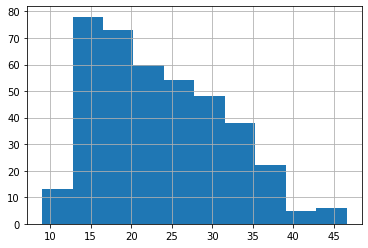

In [79]:
auto['mpg'].hist();

In [80]:
mpg_median = auto['mpg'].median()

auto['mpg01'] = auto['mpg'].apply(lambda x: 1 if x > mpg_median else 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


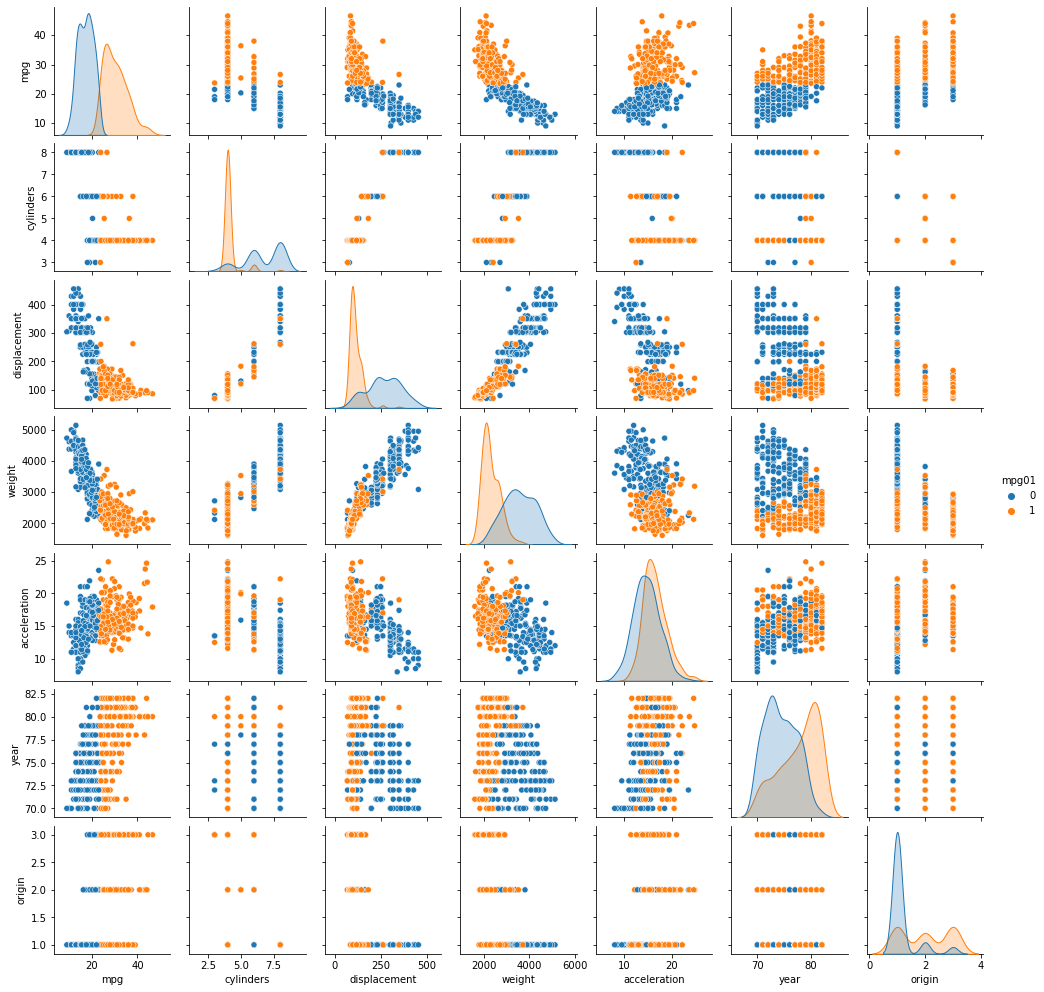

In [81]:
sns.pairplot(auto, hue='mpg01', height=2)

In [204]:
# Create is_usa feature. Assuming #1 is USA.
auto['is_usa'] = auto['origin'].apply(lambda x: 1 if x == 1 else 0)

auto_sub = auto[['mpg01', 'cylinders', 'displacement', 'weight', 'year']].copy()

In [205]:
X = auto_sub.drop('year', axis=1)
y = auto_sub['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [206]:
def train_predict_eval(model, X_train, X_test, y_train, y_test):
        #X_train = X_train.values.reshape(-1, 1)
        fitted_model = model.fit(X_train, y_train)
        y_pred = fitted_model.predict(X_test)
        
        print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
        print("\n")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

## LDA

In [207]:

train_predict_eval(LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test)

Accuracy Score: 0.9


[[49 10]
 [ 2 59]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        59
           1       0.86      0.97      0.91        61

    accuracy                           0.90       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.90      0.90       120



## QDA

In [208]:
train_predict_eval(QuadraticDiscriminantAnalysis(), X_train, X_test, y_train, y_test)

Accuracy Score: 0.49166666666666664


[[59  0]
 [61  0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        59
           1       0.00      0.00      0.00        61

    accuracy                           0.49       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.24      0.49      0.32       120



C:\Users\morga\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\morga\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Logistic Regression

In [87]:
train_predict_eval(LogisticRegression(), X_train, X_test, y_train, y_test)

Accuracy Score: 1.0


[[59  0]
 [ 0 61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        61

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## KNN

In [88]:
train_predict_eval(KNeighborsClassifier(n_neighbors=1), X_train, X_test, y_train, y_test)

Accuracy Score: 0.8666666666666667


[[46 13]
 [ 3 58]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        59
           1       0.82      0.95      0.88        61

    accuracy                           0.87       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.87      0.87       120



In [89]:
train_predict_eval(KNeighborsClassifier(n_neighbors=3), X_train, X_test, y_train, y_test)

Accuracy Score: 0.85


[[46 13]
 [ 5 56]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        59
           1       0.81      0.92      0.86        61

    accuracy                           0.85       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.85      0.85       120



In [90]:
train_predict_eval(KNeighborsClassifier(n_neighbors=7), X_train, X_test, y_train, y_test)

Accuracy Score: 0.8416666666666667


[[42 17]
 [ 2 59]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.82        59
           1       0.78      0.97      0.86        61

    accuracy                           0.84       120
   macro avg       0.87      0.84      0.84       120
weighted avg       0.86      0.84      0.84       120



## Q12

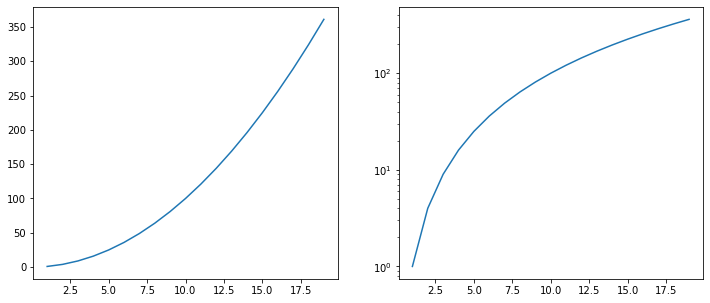

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

x = np.arange(1, 20)
y = x ** 2

axes[0].plot(x, y)
axes[1].plot(x, y)
axes[1].set_yscale('log')

# Q13

In [92]:
boston = pd.read_csv('data/Boston.csv')

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [94]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


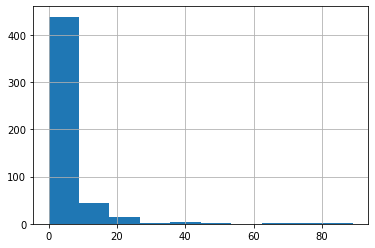

In [95]:
boston['crim'].hist();

In [96]:
median_crime = boston['crim'].median()

boston['above_median'] = boston['crim'].apply(lambda x: 1 if x > median_crime else 0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,above_median
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


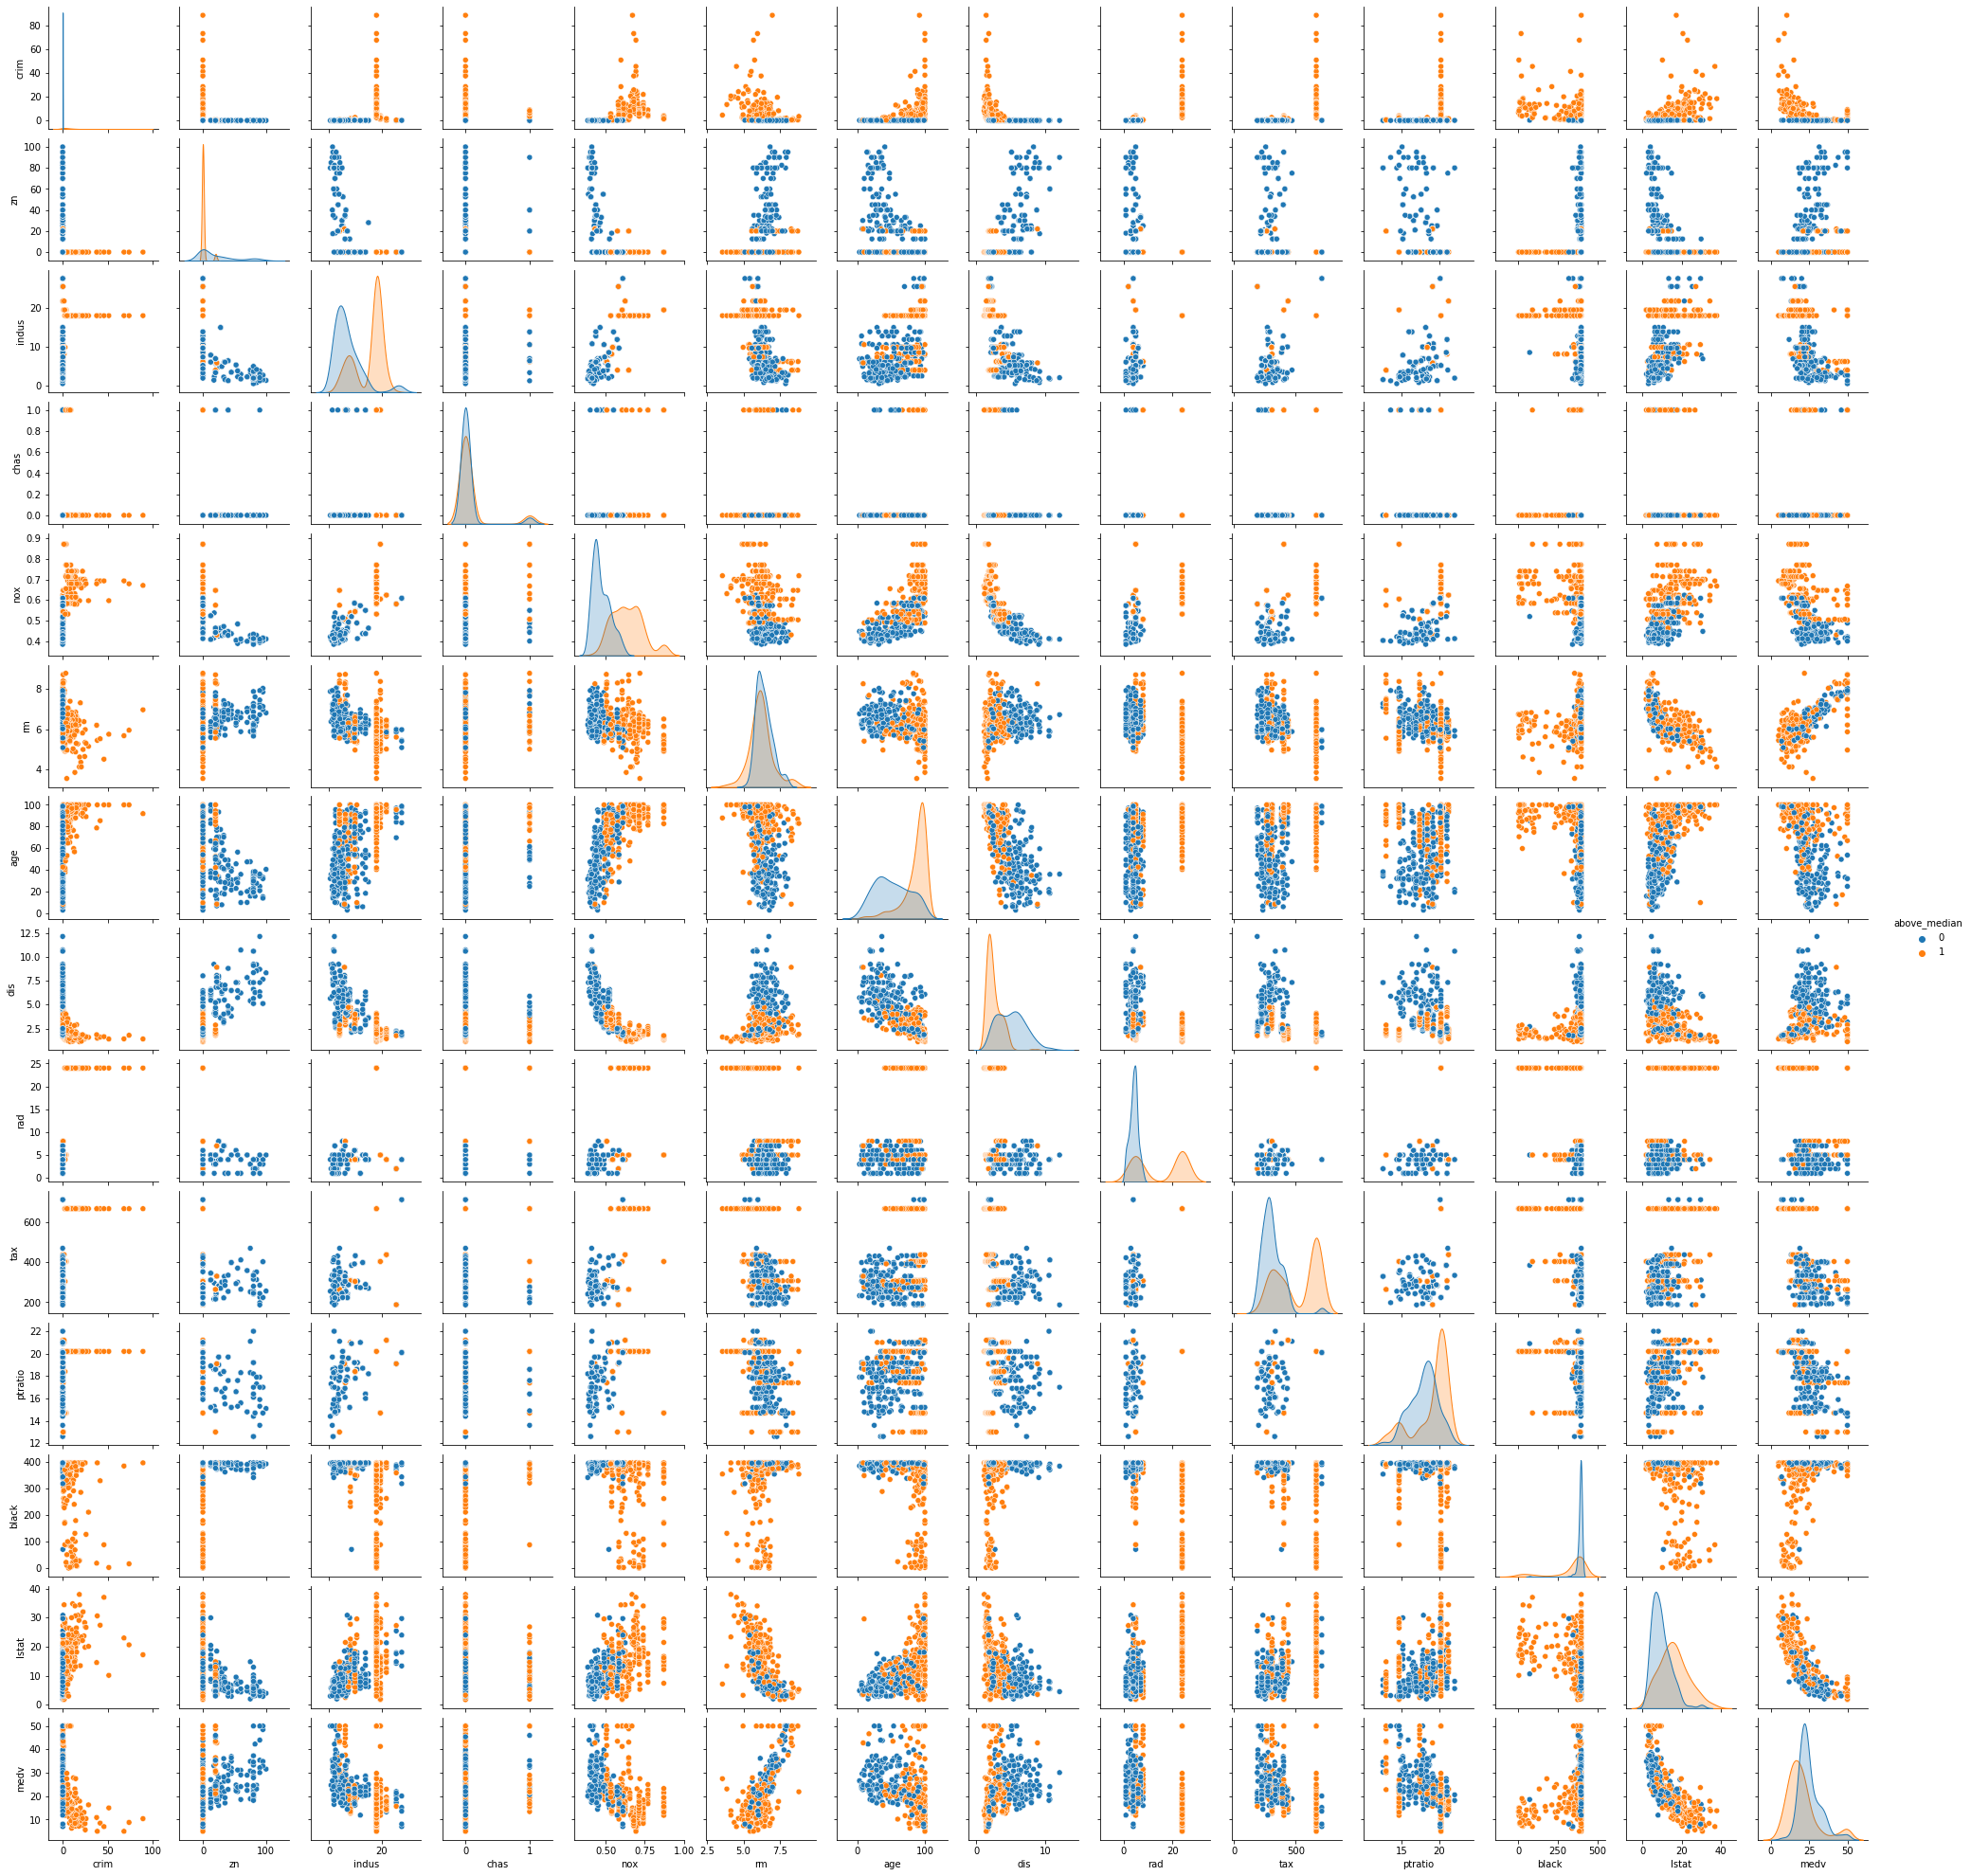

In [97]:
sns.pairplot(boston, hue='above_median', height=2)

In [144]:
boston_sub = boston[['zn', 'indus', 'age', 'dis', 'tax', 'black', 'lstat', 'medv', 'above_median']].copy()

X = boston_sub.drop('above_median', axis=1)
y = boston_sub['above_median']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## LDA

In [145]:
train_predict_eval(LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test)

Accuracy Score: 0.8092105263157895


[[62 11]
 [18 61]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        73
           1       0.85      0.77      0.81        79

    accuracy                           0.81       152
   macro avg       0.81      0.81      0.81       152
weighted avg       0.81      0.81      0.81       152



## QDA

In [146]:
train_predict_eval(QuadraticDiscriminantAnalysis(), X_train, X_test, y_train, y_test)

Accuracy Score: 0.8618421052631579


[[69  4]
 [17 62]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        73
           1       0.94      0.78      0.86        79

    accuracy                           0.86       152
   macro avg       0.87      0.87      0.86       152
weighted avg       0.87      0.86      0.86       152



## Logistic Regression - Sklearn

- Sklearn automatically applies regularization.
- Set **C equal to 1e8** to reconcile coefficients with Stats Model

In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [148]:
train_predict_eval(LogisticRegression(), X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy Score: 0.8157894736842105


[[62 11]
 [17 62]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        73
           1       0.85      0.78      0.82        79

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152



In [158]:
boston_log_model = LogisticRegression().fit(X_train_scaled, y_train)
y_pred_log_boston = boston_log_model.predict(X_test_scaled)

In [159]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_log_boston)))
print("\n")
print(confusion_matrix(y_test, y_pred_log_boston))
print(classification_report(y_test, y_pred_log_boston))

Accuracy Score: 0.8157894736842105


[[62 11]
 [17 62]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        73
           1       0.85      0.78      0.82        79

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152



In [155]:
boston_features = pd.Series(X_train.columns)#['zn', 'indus', 'nox', 'age', 'dis', 'tax', 'black', 'lstat', 'medv'])
boston_coef = boston_log_model.coef_[0]


boston_coef_df = pd.DataFrame()
boston_coef_df['feature_name'] = boston_features
boston_coef_df['coef'] = boston_coef
boston_coef_df.sort_values(by='coef', ascending=False, inplace=True)

In [156]:
boston_coef_df

,feature_name,coef
4,tax,1.432313
2,age,0.944552
7,medv,0.769899
6,lstat,0.150859
1,indus,-0.346591
3,dis,-0.493424
0,zn,-0.820372
5,black,-2.298953


In [157]:
boston_log_model = LogisticRegression(fit_intercept=True).fit(X_train_scaled, y_train)
y_pred_log_boston = boston_log_model.predict(X_test_scaled)


print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_log_boston)))
print("\n")
print(confusion_matrix(y_test, y_pred_log_boston))
print(classification_report(y_test, y_pred_log_boston))

Accuracy Score: 0.8157894736842105


[[62 11]
 [17 62]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        73
           1       0.85      0.78      0.82        79

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152



## Logistic Regression - Logit

Provide stats model w/ the scaled version.

In [140]:
# model_boston1 = sm.Logit(y_train, X_train)
# result_boston1 = model_boston1.fit(method='newton')
# result_boston1.summary()

In [160]:
X_train_scaled_const = sm.add_constant(X_train_scaled)
model_boston1 = sm.Logit(y_train, X_train_scaled_const)
result_boston1 = model_boston1.fit(method='newton')
result_boston1.summary()

Optimization terminated successfully.
         Current function value: 0.336168
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           above_median   No. Observations:                  354
Model:                          Logit   Df Residuals:                      345
Method:                           MLE   Df Model:                            8
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.5149
Time:                        19:23:27   Log-Likelihood:                -119.00
converged:                       True   LL-Null:                       -245.32
Covariance Type:            nonrobust   LLR p-value:                 4.750e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4439      0.337      1.315      0.188      -0.218       1.105
x1            -0.8204      0.383     -2.143      0.032      -1.571      -0.070
x2            -0.3466      0.277     -1.251      0.211      -0.890       0.197
x3             0.9445      0.273      3.466      0.001       0.410       1.479
x4            -0.4934      0.314     -1.569      0.117      -1.110       0.123
x5             1.4323      0.290      4.934      0.000       0.863       2.001
x6            -2.2989      0.812     -2.832      0.005      -3.890      -0.708
x7             0.1509      0.299      0.505      0.614      -0.435       0.737
x8             0.7699      0.298      2.579      0.010       0.185       1.355
==============================================================================
"""

## Test for Multicollinearity

In [161]:
def calc_vif(X):
    
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return (vif)

In [162]:
print(calc_vif(X_train))

  features        VIF
0       zn   2.319744
1    indus  11.778140
2      age  17.118840
3      dis   8.249898
4      tax  15.717721
5    black  17.720583
6    lstat  11.687196
7     medv  11.822006


## KNN

In [165]:
# 1 NEIGHBOR
train_predict_eval(KNeighborsClassifier(n_neighbors=1), X_train, X_test, y_train, y_test)

Accuracy Score: 0.9210526315789473


[[68  5]
 [ 7 72]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        73
           1       0.94      0.91      0.92        79

    accuracy                           0.92       152
   macro avg       0.92      0.92      0.92       152
weighted avg       0.92      0.92      0.92       152



In [164]:
# 3 NEIGHBORS
train_predict_eval(KNeighborsClassifier(n_neighbors=3), X_train, X_test, y_train, y_test)

Accuracy Score: 0.9144736842105263


[[68  5]
 [ 8 71]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        73
           1       0.93      0.90      0.92        79

    accuracy                           0.91       152
   macro avg       0.91      0.92      0.91       152
weighted avg       0.92      0.91      0.91       152



In [166]:
# 5 NEIGHBORS
train_predict_eval(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)

Accuracy Score: 0.9210526315789473


[[69  4]
 [ 8 71]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        73
           1       0.95      0.90      0.92        79

    accuracy                           0.92       152
   macro avg       0.92      0.92      0.92       152
weighted avg       0.92      0.92      0.92       152



In [167]:
# 7 NEI
train_predict_eval(KNeighborsClassifier(n_neighbors=7), X_train, X_test, y_train, y_test)

Accuracy Score: 0.8881578947368421


[[65  8]
 [ 9 70]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        73
           1       0.90      0.89      0.89        79

    accuracy                           0.89       152
   macro avg       0.89      0.89      0.89       152
weighted avg       0.89      0.89      0.89       152

